# DATA PREPROCESSING

In [111]:
# Importing necessary libraries
import numpy as np
import seaborn as sns
import pandas as pd

## Importing the City data

In [112]:
df_city = pd.read_csv("/Users/rithvija/Downloads/cities.csv", header=0)
df_city.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


#### Renaming columns

In [113]:
df_city.rename(columns={'Metrio City': 'metro', 'non-metro cities': 'non_metro'}, inplace=True)
df_city.head()

,metro,non_metro
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


#### Define a function to assign numerical values based on city type (metro or non-metro)


In [114]:
def city(row):
    if row['City'] in df_city['metro'].values:
        return 1
    elif row['City'] in df_city['non_metro'].values:
        return 0
    else:
        return 'unknown'


## Importing the Colleges data

In [115]:
df_college = pd.read_csv("/Users/rithvija/Downloads/Colleges.csv", header=0)
df_college.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


#### Renaming columns

In [116]:
df_college.rename(columns={'Tier 1': 'Tier_1', 'Tier 2': 'Tier_2', 'Tier 3': 'Tier_3'}, inplace=True)

In [117]:
def tier(row):
    if row['College'] in df_college['Tier_1'].values:
        return 'Tier 1'
    elif row['College'] in df_college['Tier_2'].values:
        return 'Tier 2'
    elif row['College'] in df_college['Tier_3'].values:
        return 'Tier 3'
    else:
        return 'Unknown'

In [118]:
df_college.head()

,Tier_1,Tier_2,Tier_3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


## Importing the City data

In [119]:
df = pd.read_csv("/Users/rithvija/Downloads/ML case Study.csv", header=0)
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [120]:
# Number of row and columns of our data
df.shape

(1589, 8)

In [121]:
# Number of Duplicates
print(len(df[df.duplicated()]))

0


In [122]:
# Applying the 'tier' function to create a new 'Tier' column based on the 'College' column
df['Tier'] = df.apply(tier, axis=1)

In [123]:
# Applying the 'city' function to create a new 'metro_city' column based on the 'City' column
df['metro_city'] = df.apply(city, axis=1)

In [124]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Tier,metro_city
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58,Tier 2,0
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87,Tier 2,0
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02,Tier 3,0
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39,Tier 3,0
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10,Tier 1,0


In [125]:
# Removing the 'College' and 'City' columns from the DataFrame
del df['College']
del df['City']

In [126]:
# Creating dummy variables for the 'Tier' and 'Role' columns
df = pd.get_dummies(df, columns=['Tier', 'Role'])

In [127]:
df.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,metro_city,Tier_Tier 1,Tier_Tier 2,Tier_Tier 3,Role_Executive,Role_Manager
0,55523.0,3,66,19,71406.58,0,False,True,False,False,True
1,57081.0,1,84,18,68005.87,0,False,True,False,True,False
2,60347.0,2,52,28,76764.02,0,False,False,True,True,False
3,49010.0,2,81,33,82092.39,0,False,False,True,True,False
4,57879.0,4,74,32,73878.10,0,True,False,False,True,False


In [128]:
# Renaming columns
df.rename(columns={'Tier_Tier 1': 'Tier_1', 'Tier_Tier 2': 'Tier_2', 'Tier_Tier 3': 'Tier_3'}, inplace=True)

In [129]:
df.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,metro_city,Tier_1,Tier_2,Tier_3,Role_Executive,Role_Manager
0,55523.0,3,66,19,71406.58,0,False,True,False,False,True
1,57081.0,1,84,18,68005.87,0,False,True,False,True,False
2,60347.0,2,52,28,76764.02,0,False,False,True,True,False
3,49010.0,2,81,33,82092.39,0,False,False,True,True,False
4,57879.0,4,74,32,73878.10,0,True,False,False,True,False


In [131]:
# Converting categorical columns to numerical format
df['Tier_1'] = df['Tier_1'].astype(int)
df['Tier_2'] = df['Tier_2'].astype(int)
df['Tier_3'] = df['Tier_3'].astype(int)
df['Role_Executive'] = df['Role_Executive'].astype(int)
df['Role_Manager'] = df['Role_Manager'].astype(int)

In [132]:
df.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,metro_city,Tier_1,Tier_2,Tier_3,Role_Executive,Role_Manager
0,55523.0,3,66,19,71406.58,0,0,1,0,0,1
1,57081.0,1,84,18,68005.87,0,0,1,0,1,0
2,60347.0,2,52,28,76764.02,0,0,0,1,1,0
3,49010.0,2,81,33,82092.39,0,0,0,1,1,0
4,57879.0,4,74,32,73878.10,0,1,0,0,1,0


## EDD

In [134]:
# Displaying information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Previous CTC         1589 non-null   float64
 1   Previous job change  1589 non-null   int64  
 2   Graduation Marks     1589 non-null   int64  
 3   EXP (Month)          1589 non-null   int64  
 4   CTC                  1589 non-null   float64
 5   metro_city           1589 non-null   int64  
 6   Tier_1               1589 non-null   int64  
 7   Tier_2               1589 non-null   int64  
 8   Tier_3               1589 non-null   int64  
 9   Role_Executive       1589 non-null   int64  
 10  Role_Manager         1589 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 136.7 KB


In [136]:
df.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,metro_city,Tier_1,Tier_2,Tier_3,Role_Executive,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798,0.514160,0.363751,0.297042,0.339207,0.793581,0.206419
std,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.499957,0.481230,0.457099,0.473589,0.404862,0.404862
min,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Jointplot between 'Previous CTC' and 'CTC'

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


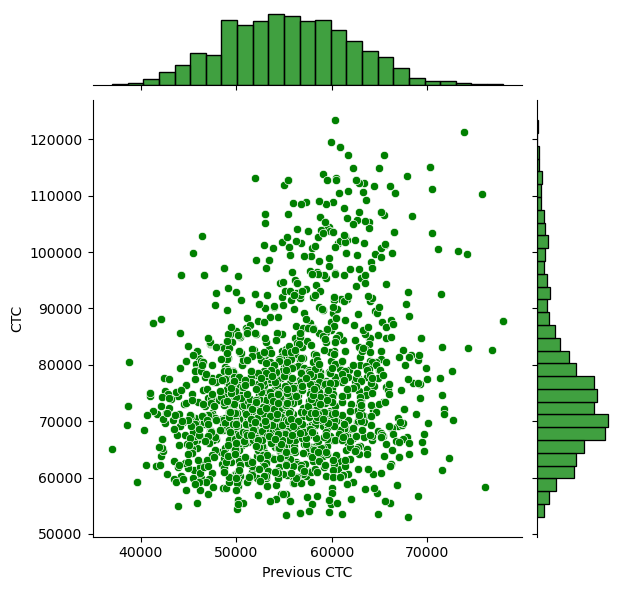

In [137]:
sns.jointplot(x='Previous CTC', y='CTC', data=df, color="Green")

## Jointplot between 'Graduation Marks' and 'CTC'

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


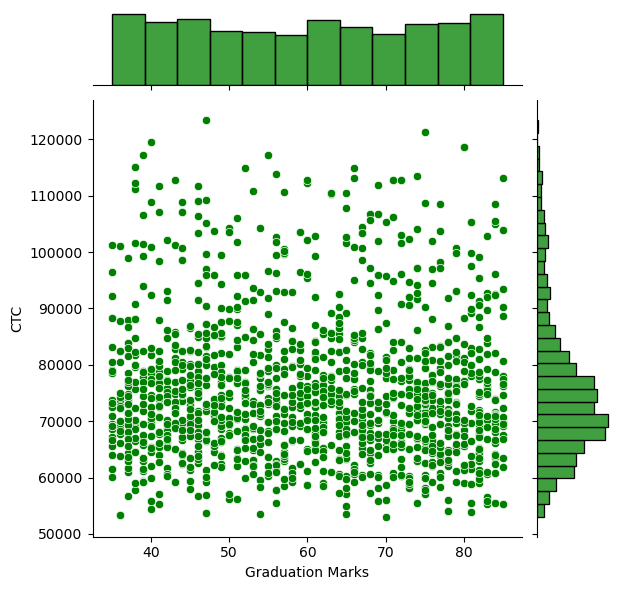

In [139]:
sns.jointplot(x='Graduation Marks', y='CTC', data=df, color="Green")

## Jointplot between 'EXP (Month)' and 'CTC'

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


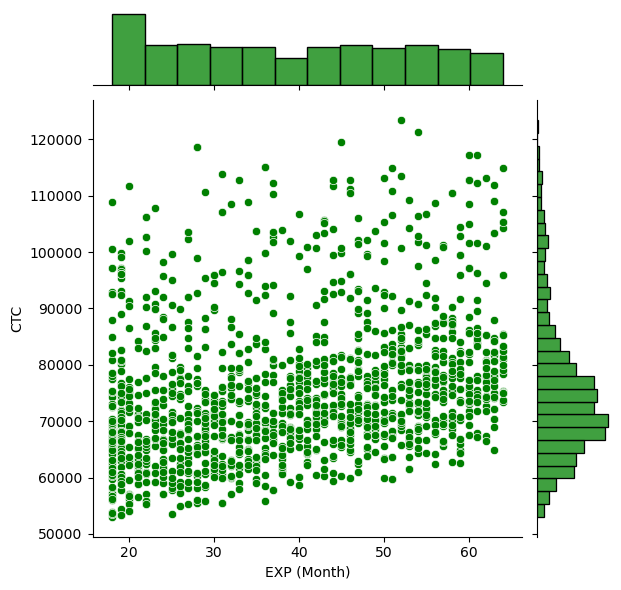

In [140]:
sns.jointplot(x='EXP (Month)', y='CTC', data=df, color="Green")

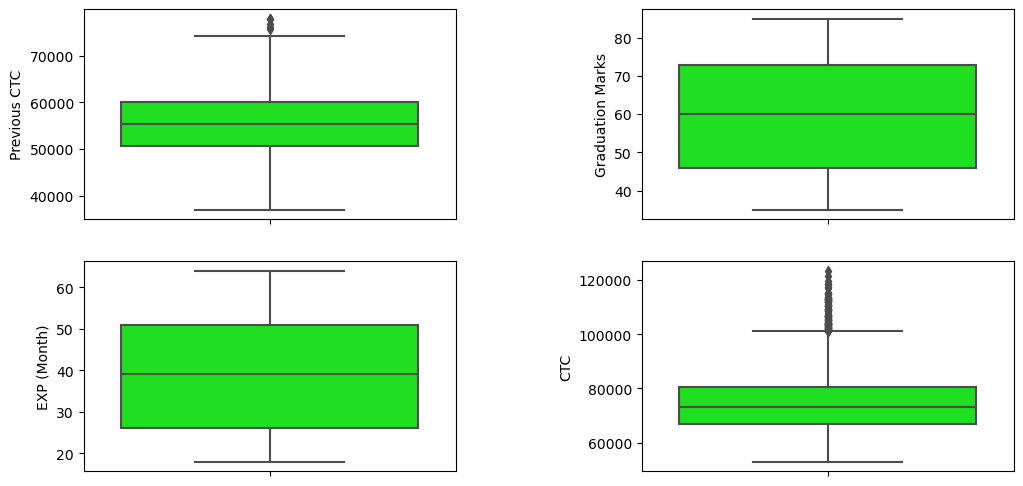

In [156]:
import matplotlib.pyplot as plt
num_col = ['Previous CTC', 'Graduation Marks', 'EXP (Month)', 'CTC']
plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace=0.5)
for i, col in enumerate(num_col, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, y=col, color='lime')
plt.show()

## Plot a distribution plot for 'CTC'

/var/folders/wq/5z_74vv5099d7f6tm36jyt280000gn/T/ipykernel_14154/72983472.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CTC'], color='skyblue')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='CTC', ylabel='Density'>

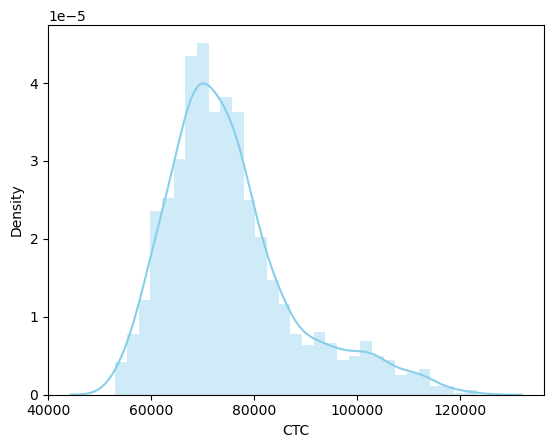

In [157]:
sns.distplot(df['CTC'], color='skyblue')

In [158]:
# Calculate the 99th percentile of 'Previous CTC'
upper_limit = np.percentile(df['Previous CTC'], [99])[0]

In [159]:
# Print the calculated upper limit
print(upper_limit)

71506.92


In [160]:
# Filter rows where 'Previous CTC' is greater than the calculated upper limit
df[(df['Previous CTC'] > upper_limit)]

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,metro_city,Tier_1,Tier_2,Tier_3,Role_Executive,Role_Manager
116,77911.0,1,50,58,87831.62,1,0,0,1,1,0
292,74198.0,1,57,25,99644.51,0,0,0,1,0,1
543,73856.0,1,75,54,121362.73,1,1,0,0,0,1
572,71543.0,4,82,30,61366.78,1,1,0,0,1,0
701,71549.0,4,47,50,83116.21,0,0,1,0,1,0
847,71756.0,4,67,23,72141.43,1,1,0,0,1,0
860,75785.0,4,63,37,110338.25,1,1,0,0,0,1
941,72319.0,1,51,50,63538.43,1,0,0,1,1,0
1024,72661.0,3,74,47,70238.70,1,1,0,0,1,0
1047,73214.0,4,57,22,100119.53,0,1,0,0,0,1


In [161]:
# Cap values in 'Previous CTC' column to 3 times the upper limit
df['Previous CTC'][(df['Previous CTC'] > 3 * upper_limit)] = 3 * upper_limit

/var/folders/wq/5z_74vv5099d7f6tm36jyt280000gn/T/ipykernel_14154/972866738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Previous CTC'][(df['Previous CTC'] > 3 * upper_limit)] = 3 * upper_limit


In [162]:
# Calculate the 99th percentile of 'CTC'
upper_limit2 = np.percentile(df['CTC'], [99])[0]
print(upper_limit2)

112826.26


In [163]:
# Display rows where 'CTC' is greater than the 99th percentile
df[(df['CTC'] > upper_limit2)]

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,metro_city,Tier_1,Tier_2,Tier_3,Role_Executive,Role_Manager
34,60894.0,4,80,28,118651.89,0,1,0,0,0,1
185,70258.0,4,38,36,115126.75,0,0,1,0,0,1
254,51912.0,2,66,50,113141.14,1,0,1,0,0,1
328,62264.0,2,52,64,114996.23,0,0,0,1,0,1
543,73856.0,1,75,54,121362.73,1,1,0,0,0,1
577,59101.0,3,56,31,113843.16,1,0,0,1,0,1
668,60476.0,1,85,62,113212.07,1,1,0,0,0,1
883,64930.0,1,66,51,114939.65,1,0,0,1,0,1
1146,61709.0,4,39,60,117207.24,1,1,0,0,0,1
1230,60298.0,1,47,52,123416.99,0,0,1,0,0,1


In [164]:
# Set 'CTC' values that are more than 3 times the upper limit to 3 times the upper limit
df['CTC'][(df['CTC'] > 3 * upper_limit2)] = 3 * upper_limit2

/var/folders/wq/5z_74vv5099d7f6tm36jyt280000gn/T/ipykernel_14154/507160942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CTC'][(df['CTC'] > 3 * upper_limit2)] = 3 * upper_limit2


In [165]:
# Calculate correlation matrix for the dataframe
df.corr()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,metro_city,Tier_1,Tier_2,Tier_3,Role_Executive,Role_Manager
Previous CTC,1.000000,0.005756,-0.032976,0.119163,0.258000,0.004644,-0.031366,-0.010947,0.042438,-0.012321,0.012321
Previous job change,0.005756,1.000000,0.019267,0.023488,0.011370,0.051670,0.045931,0.004271,-0.050794,0.017150,-0.017150
Graduation Marks,-0.032976,0.019267,1.000000,-0.057061,-0.005450,-0.018616,0.005666,-0.018419,0.012021,-0.017858,0.017858
EXP (Month),0.119163,0.023488,-0.057061,1.000000,0.301115,-0.023613,-0.003323,-0.014558,0.017427,0.026751,-0.026751
CTC,0.258000,0.011370,-0.005450,0.301115,1.000000,-0.020365,0.019912,0.012346,-0.032149,-0.621311,0.621311
metro_city,0.004644,0.051670,-0.018616,-0.023613,-0.020365,1.000000,0.002135,0.022917,-0.024288,0.048671,-0.048671
Tier_1,-0.031366,0.045931,0.005666,-0.003323,0.019912,0.002135,1.000000,-0.491510,-0.541736,-0.015158,0.015158
Tier_2,-0.010947,0.004271,-0.018419,-0.014558,0.012346,0.022917,-0.491510,1.000000,-0.465741,0.004865,-0.004865
Tier_3,0.042438,-0.050794,0.012021,0.017427,-0.032149,-0.024288,-0.541736,-0.465741,1.000000,0.010706,-0.010706
Role_Executive,-0.012321,0.017150,-0.017858,0.026751,-0.621311,0.048671,-0.015158,0.004865,0.010706,1.000000,-1.000000


# Salary Prediction Machine Learning Model Building

## TEST TRAIN SPLIT

In [174]:
from sklearn.model_selection import train_test_split
 # Spliting the dataset into features (x) and the target variable (y)
X = df.loc[:, df.columns != 'CTC']
y= df['CTC']
# Split the data into training and testing sets with a 20% test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [175]:
# Print the shapes of the training and testing sets to confirm the split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1271, 10) (318, 10) (1271,) (318,)


## 1.   SIMPLE LINEAR REGRESSION

In [176]:
# Import the Linear Regression model from scikit-learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model and fit it to the data
lm = LinearRegression()
y_sng = df['CTC']
x_sng = df[['EXP (Month)']]
lm.fit(x_sng, y_sng)

LinearRegression()

In [177]:
# Print the intercept and coefficients of the linear regression model
print(lm.intercept_, lm.coef_)

64864.26270700761 [268.6413489]


In [178]:
# Predict CTC values using the linear regression model
lm.predict(x_sng)

array([69968.44833614, 69699.80698724, 72386.22047626, ...,
       69968.44833614, 72654.86182516, 69699.80698724])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


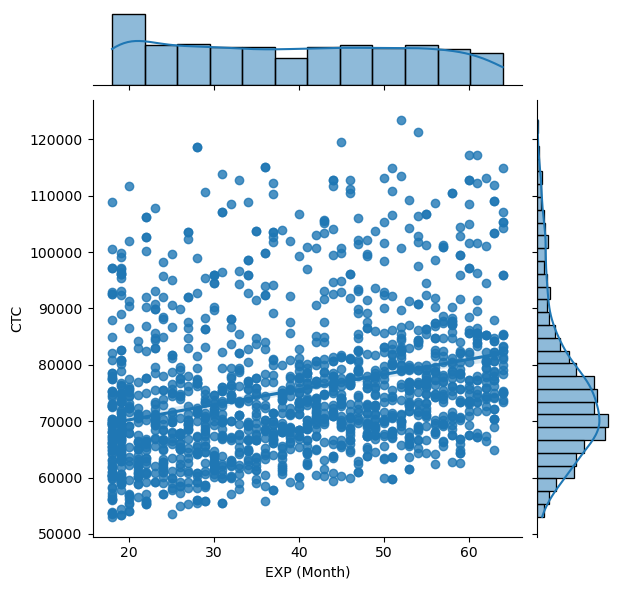

In [179]:
# Visualize the linear regression model's fit on the data
sns.jointplot(x=df['EXP (Month)'], y=df['CTC'], data=df, kind='reg')

## 2. MULTIPLE LINEAR REGRESSION

In [181]:
# importing linear regression object
from sklearn.linear_model import LinearRegression
### creating linear regression object
ln1=LinearRegression()                 

In [182]:
### fitting x_train and y_train on linear regression data
ln1.fit(X_train,y_train)

LinearRegression()

In [183]:
print(ln1.intercept_, ln1.coef_) ### finding intercept and coefficient of linear regreesion model

45804.70386202638 [ 4.29560583e-01  9.16241174e+01  1.01809891e+01  2.57802465e+02
  9.14527889e+02  2.20836623e+02  3.59103585e+02 -5.79940208e+02
 -9.62636903e+03  9.62636903e+03]


In [186]:
from sklearn.metrics import r2_score, mean_squared_error #importing r2_score and mse from sklearn
##predictin x and y variables
y_test_p= ln1.predict(X_test)
y_train_p= ln1.predict(X_train)

In [187]:
r2_score(y_test, y_test_p) ###R2 of test

0.5366674761765405

In [188]:
r2_score(y_train, y_train_p) ####R2 of train

0.5335038205027318

In [189]:
### Finding MSE value for linear regression
mean_squared_error(y_test, y_test_p, squared=False)

8291.641811462556

In [191]:
# Result
print("Linear Regression:")
print(f"R-squared (R^2) - Train: {r2_score(y_test, y_test_p)}, Test: {r2_score(y_train, y_train_p)}")
print(f"Mean Squared Error (MSE) - Train: {mean_squared_error(y_train, y_train_p)}, Test: {mean_squared_error(y_test, y_test_p, squared=False)}\n")

Linear Regression:
R-squared (R^2) - Train: 0.5366674761765405, Test: 0.5335038205027318
Mean Squared Error (MSE) - Train: 75026071.40800601, Test: 8291.641811462556



## 3. Ridge Regression Model

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


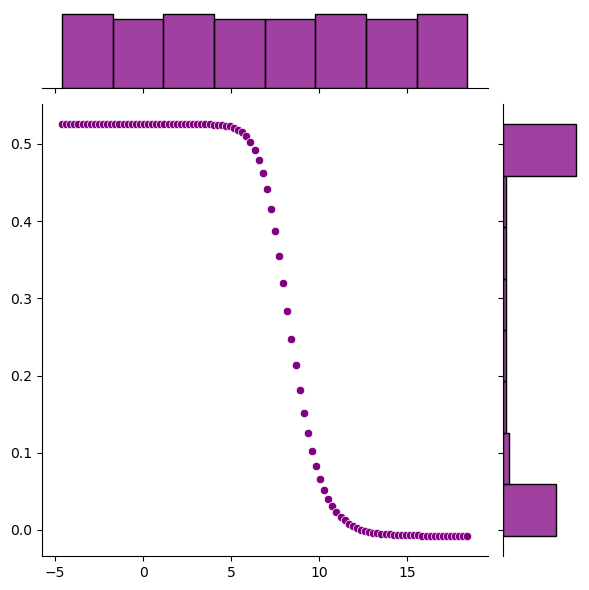

In [192]:
# Import the preprocessing module from scikit-learn
from sklearn import preprocessing

# Standardize the features using StandardScaler
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

# Import the validation_curve module from scikit-learn
from sklearn.model_selection import validation_curve

# Define a range of alpha values for Ridge regression
param_range = np.logspace(-2, 8, 100)

# Import the Ridge regression model from scikit-learn
from sklearn.linear_model import Ridge

# Perform cross-validated validation curve to find the best alpha for Ridge regression
train_scores, valid_scores = validation_curve(
    Ridge(), X_train_s, y_train, param_name="alpha", param_range=param_range, cv=5, scoring='r2')

# Calculate mean R-squared scores for training and validation sets
train_mean = np.mean(train_scores, axis = 1)
test_mean = np.mean(valid_scores, axis = 1)

# Create a joint plot to visualize the relationship between log(alpha) and R-squared
sns.jointplot(x=np.log(param_range), y=test_mean,color='purple')

In [193]:
# Find the alpha value with the highest validation R-squared
np.where(test_mean==max(test_mean))

(array([30]),)

In [194]:
# Train a Ridge regression model with the best alpha
ln1_best = Ridge(alpha = param_range[30])
ln1_best.fit(X_train_s, y_train)

Ridge(alpha=10.722672220103231)

In [195]:
ln1_best.predict(X_train_s)

array([98331.65213125, 74120.26894224, 79229.31588627, ...,
       70680.40885808, 66376.90041009, 64144.8483454 ])

In [196]:
ln1_best.predict(X_test_s)

array([69103.28263809, 64254.92417147, 63739.1987679 , 71997.22260219,
       76667.23898114, 88736.7373297 , 69246.81305502, 71367.44793289,
       70966.53770842, 73630.39004638, 72270.28419405, 78582.53843415,
       85420.11764726, 78099.31373499, 77076.09690345, 93960.65913441,
       66399.76146096, 69039.14616283, 67285.91677749, 81781.55800355,
       91142.40110084, 96544.64265718, 71209.10742538, 67484.23493064,
       72583.82876218, 68306.86966018, 73627.68526001, 94500.90500035,
       72140.0835308 , 74401.32869792, 69008.9370696 , 69955.32641021,
       85470.02498289, 80538.31021215, 98658.07904935, 80318.9172221 ,
       71372.26418478, 80785.57411537, 74026.58408362, 65823.81578572,
       71501.43381754, 87862.27298079, 73034.37606993, 67860.19249436,
       74959.93622992, 78195.69964275, 86488.59623627, 68172.6897819 ,
       69486.6170619 , 76639.13033968, 90152.08016158, 69753.65076428,
       91551.02088016, 73119.99725431, 89839.82154365, 69491.02764058,
      

In [197]:
# Calculate the R-squared score
r2_score(y_train,ln1_best.predict(X_train_s))

0.533488604458334

In [198]:
r2_score(y_test,ln1_best.predict(X_test_s))

0.5365825624279877

In [199]:
# Finding MSE value for linear regression
mean_squared_error(y_test, ln1_best.predict(X_test_s), squared=False)

8292.401570486747

In [200]:
# Results
print("Ridge Regression:")
print(f"R-squared (R^2) - Train: {r2_score(y_train,ln1_best.predict(X_train_s))}, Test: {r2_score(y_test,ln1_best.predict(X_test_s))}")
print(f"Mean Squared Error (MSE) - Train: {mean_squared_error(y_train,ln1_best.predict(X_train_s), squared=False)}, Test: {mean_squared_error(y_test, ln1_best.predict(X_test_s), squared=False)}\n")

Ridge Regression:
R-squared (R^2) - Train: 0.533488604458334, Test: 0.5365825624279877
Mean Squared Error (MSE) - Train: 8661.900402788033, Test: 8292.401570486747



## 4. LASSO REGRESSION

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


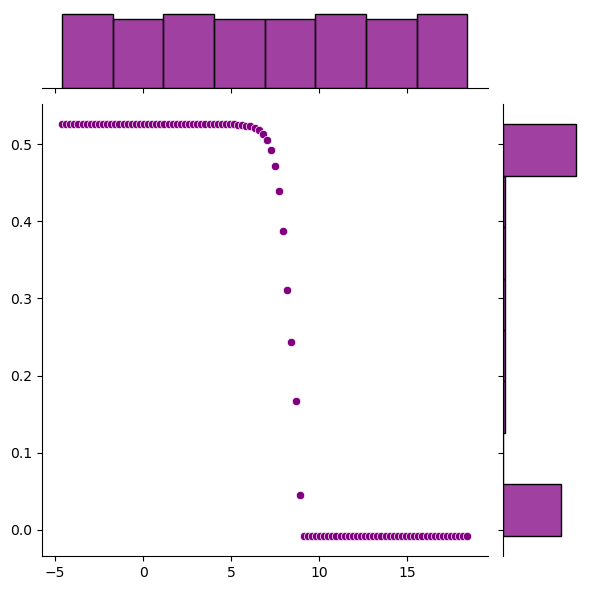

In [203]:
# Import Lasso regression model
from sklearn.linear_model import Lasso

# Define a range of alpha values for Lasso regression
param_range2 = np.logspace(-2,8,100)

# Perform cross-validated validation curve to find the best alpha for Lasso regression
train_score_l, valid_score_l = validation_curve(Lasso(), X_train_s, y_train, param_name="alpha", param_range = param_range2, cv=5, scoring='r2')

# Calculate mean R-squared scores for training and validation sets with Lasso regression
train_mean_l = np.mean(train_score_l, axis=1)
test_mean_l = np.mean(valid_score_l, axis=1)

#Create a joint plot to visualize the relationship between log(alpha) and R-squared
sns.jointplot(x=np.log(param_range2), y=test_mean_l,color='PURPLE')

In [204]:
# Identify the alpha value with the highest R-squared
np.where(test_mean_l==max(test_mean_l))

(array([39]),)

In [205]:
# Train a Lasso regression model with the best alpha
ln2_best = Lasso(alpha = param_range2[39])
ln2_best.fit(X_train_s, y_train)

Lasso(alpha=86.97490026177834)

In [206]:
ln2_best.predict(X_train_s)

array([97926.33028565, 74214.8559853 , 79240.62162971, ...,
       70535.51110735, 66629.84078582, 64276.35722756])

In [207]:
ln2_best.predict(X_test_s)

array([69019.33032291, 64390.06576342, 63587.2886881 , 72168.23895861,
       76608.99099052, 88923.59188014, 69305.93123459, 71482.29953649,
       71156.09669352, 73843.1402233 , 72395.87185541, 78532.57717035,
       85585.80902691, 78179.48006681, 77061.46073093, 93557.9970026 ,
       66167.63000471, 68833.72679837, 67322.22318288, 81421.47961899,
       90865.88318109, 96313.78528565, 71379.22942132, 67397.85119205,
       72740.5043779 , 68336.08005293, 73549.59047391, 94164.93036187,
       72405.75742872, 74438.23200467, 69004.49132446, 69881.85187782,
       85353.24821954, 80530.92244898, 98338.45414735, 79983.04382109,
       71297.36650121, 80933.92201416, 73822.63298583, 66086.05508966,
       71650.29702114, 87694.8452489 , 73132.59902275, 67701.38253863,
       74871.04680053, 77932.03161175, 86763.15262692, 67921.9813633 ,
       69531.19869709, 76658.40007527, 89887.58627483, 69813.32102187,
       91435.46041473, 73086.55418568, 89463.84928655, 69680.94831651,
      

In [208]:
 r2_score(y_train, ln2_best.predict(X_train_s))

0.5331672792979155

In [209]:
r2_score(y_test, ln2_best.predict(X_test_s))

0.5373948689445132

In [210]:
mean_squared_error(y_test, ln2_best.predict(X_test_s))

68643390.1817055

In [211]:
# Results
print("Lasso Regression:")
print(f"R-squared (R^2) - Train: { r2_score(y_train, ln2_best.predict(X_train_s))}, Test: {r2_score(y_test, ln2_best.predict(X_test_s))}")
print(f"Mean Squared Error (MSE) - Train: {mean_squared_error(y_train, ln2_best.predict(X_train_s))}, Test: {mean_squared_error(y_test, ln2_best.predict(X_test_s))}\n")

Lasso Regression:
R-squared (R^2) - Train: 0.5331672792979155, Test: 0.5373948689445132
Mean Squared Error (MSE) - Train: 75080196.96267076, Test: 68643390.1817055



## 5. DECISION TREE REGRESSION

In [241]:
from sklearn import tree

# Create a DecisionTreeRegressor with a maximum depth of 3
regtree = tree.DecisionTreeRegressor(max_depth = 3)

regtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [242]:
y_train_pred = regtree.predict(X_train)
y_test_pred = regtree.predict(X_test)

y_test_pred

array([ 73242.49487805,  67137.92249315,  67137.92249315,  77249.90582677,
        73242.49487805,  87264.44514286,  70080.03361607,  73242.49487805,
        67137.92249315,  73242.49487805,  70080.03361607,  77249.90582677,
        95311.75026316,  77249.90582677,  73242.49487805, 104985.9661039 ,
        67137.92249315,  67137.92249315,  67137.92249315,  77249.90582677,
       104985.9661039 , 104985.9661039 ,  67137.92249315,  67137.92249315,
        70080.03361607,  67137.92249315,  77249.90582677, 104985.9661039 ,
        77249.90582677,  73242.49487805,  67137.92249315,  67137.92249315,
        77180.13443038,  77249.90582677, 104985.9661039 ,  77249.90582677,
        67137.92249315,  77180.13443038,  67137.92249315,  67137.92249315,
        67137.92249315,  77180.13443038,  73242.49487805,  67137.92249315,
        77249.90582677,  70080.03361607,  77180.13443038,  67137.92249315,
        67137.92249315,  73242.49487805,  95311.75026316,  77249.90582677,
       104985.9661039 ,  

In [243]:
mean_squared_error(y_test, y_test_pred)

60424631.02613475

In [244]:
r2_score(y_train, y_train_pred)

0.6137194061789908

In [245]:
r2_score(y_test, y_test_pred)

0.5927831611924911

In [246]:
%pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [247]:
# Visualize the decision tree using Graphviz
dot_data = tree.export_graphviz(regtree, out_file=None, feature_names=X_train.columns, filled=True)
from IPython.display import Image
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)


In [248]:
# Results
print("Decision Tree Regression:")
print(f"R-squared (R^2) - Train: {r2_score(y_train, y_train_pred)}, Test: {r2_score(y_test, y_test_pred)}")
print(f"Mean Squared Error (MSE) - Train: {mean_squared_error(y_train, y_train_pred)}, Test: {mean_squared_error(y_test, y_test_pred)}\n")

Decision Tree Regression:
R-squared (R^2) - Train: 0.6137194061789908, Test: 0.5927831611924911
Mean Squared Error (MSE) - Train: 62125086.31211998, Test: 60424631.02613475



## 6. DECISION TREE REGRESSION WITH GridSearchCV

In [249]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
# Define the DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
# Define the hyperparameter grid to search
param_grid = {'max_depth': [2, 3, 4, 5],'min_samples_split': [2,4, 5,6, 10],'min_samples_leaf': [1, 2, 4,6,8]}
# Create the GridSearchCV object
grid_search = GridSearchCV(dt_reg, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# Fit the model
grid_search.fit(X_train, y_train)
# Get the best hyperparameters
best_params = grid_search.best_params_
# Get the best model
best_model = grid_search.best_estimator_
# Make predictions on the test set
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Calculate R-squared scores
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Print the results
print("Decision Tree Regression with GridSearchCV")
print(f"Mean Squared Error on the training set: {mse_train}")
print(f"Mean Squared Error on the test set: {mse_test}")

# Print R-squared scores
print(f"R-squared score on the training set: {r2_train}")
print(f"R-squared score on the test set: {r2_test}")

# Print the best hyperparameters
print("Best hyperparameters:", best_params)

Decision Tree Regression with GridSearchCV
Mean Squared Error on the training set: 57933285.64360235
Mean Squared Error on the test set: 58875901.69009934
R-squared score on the training set: 0.6397831325660944
R-squared score on the test set: 0.603220439065417
Best hyperparameters: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 4}


## 7. RANDOM FOREST REGRESSION WITH GRIDSEARCH CV

In [251]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
# Define the hyperparameters and their possible values
param_grid = {'n_estimators': [100, 300],'max_depth': [20, 30],'min_samples_split': [5, 10], 'min_samples_leaf': [2, 4]}
# Create a RandomForestRegressor
rf_gs = RandomForestRegressor()
# Create the GridSearchCV object
grid_search = GridSearchCV(rf_gs, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)
print("RandomForestRegressor with GridSearchCV:")
# Pint the best hyperparameters and corresponding mean squared error
print("Best Hyperparameters: ", grid_search.best_params_)
# Get the best estimator (RandomForestRegressor) with the best hyperparameters
best_rf = grid_search.best_estimator_
# Use the best estimator to make predictions
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)
# Calculate the R-squared scores for training data
r2_train_rf = r2_score(y_train, y_train_pred)
# Calculate the R-squared scores for testing data
r2_test_rf = r2_score(y_test, y_test_pred)

# Calculate the Mean Squared Error for training data
mse_train_rf = mean_squared_error(y_train, y_train_pred)
# Calculate the Mean Squared Error for testing data
mse_test_rf = mean_squared_error(y_test, y_test_pred)
# Print the results
print("R-squared (R2) for Training Data:", r2_train_rf)
print("R-squared (R2) for Testing Data:", r2_test_rf)
print("Mean Squared Error (MSE) for Training Data:", mse_train_rf)
print("Mean Squared Error (MSE) for Testing Data:", mse_test_rf)

RandomForestRegressor with GridSearchCV:
Best Hyperparameters:  {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
R-squared (R2) for Training Data: 0.8971629406075223
R-squared (R2) for Testing Data: 0.6486663086252211
Mean Squared Error (MSE) for Training Data: 16539172.02426857
Mean Squared Error (MSE) for Testing Data: 52132443.07514


In [253]:
# Perform cross-validation to calculate training and validation scores
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='r2')
cv_mse = -cross_val_score(best_rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate mean R-squared and MSE for cross-validation
mean_cv_r2 = cv_scores.mean()
mean_cv_mse = cv_mse.mean()

# Print cross-validation results
print("Mean R-squared (R2) for Cross-Validation:", mean_cv_r2)
print("Mean Mean Squared Error (MSE) for Cross-Validation:", mean_cv_mse)

Mean R-squared (R2) for Cross-Validation: 0.6048772725054203
Mean Mean Squared Error (MSE) for Cross-Validation: 63366474.41720811


## 8. BOOST REGRESSOR

In [258]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
import time


In [257]:
%pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 6.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [259]:
# XGBoost
start_time = time.time()
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=0)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_training_time = time.time() - start_time

# Gradient Boosting
start_time = time.time()
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=0)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_training_time = time.time() - start_time

# AdaBoost
start_time = time.time()
ada_model = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=0)
ada_model.fit(X_train, y_train)
ada_pred = ada_model.predict(X_test)
ada_mse = mean_squared_error(y_test, ada_pred)
ada_training_time = time.time() - start_time

# Cross-validation scores
cv_xgb = cross_val_score(xgb_model, X, y, cv=5, scoring='neg_mean_squared_error').mean()
cv_gb = cross_val_score(gb_model, X, y, cv=5, scoring='neg_mean_squared_error').mean()
cv_ada = cross_val_score(ada_model, X, y, cv=5, scoring='neg_mean_squared_error').mean()
print("Boosting:")
# Print results
print("XGBoost MSE on test set:", xgb_mse)
print("Gradient Boosting MSE on test set:", gb_mse)
print("AdaBoost MSE on test set:", ada_mse)

print("\nXGBoost Cross-Validation MSE:", -cv_xgb)
print("Gradient Boosting Cross-Validation MSE:", -cv_gb)
print("AdaBoost Cross-Validation MSE:", -cv_ada)

print("\nXGBoost Training Time:", xgb_training_time)
print("Gradient Boosting Training Time:", gb_training_time)
print("AdaBoost Training Time:", ada_training_time)
# Identify the best model
best_model = min({"XGBoost": xgb_mse, "Gradient Boosting": gb_mse, "AdaBoost": ada_mse}.items(), key=lambda x: x[1])
print(f"\nBest Boosting Algorithm: {best_model[0]} with MSE: {best_model[1]}")

Boosting:
XGBoost MSE on test set: 54218122.41774174
Gradient Boosting MSE on test set: 56652269.71261414
AdaBoost MSE on test set: 60450454.93164119

XGBoost Cross-Validation MSE: 58742562.79002507
Gradient Boosting Cross-Validation MSE: 59167220.74099176
AdaBoost Cross-Validation MSE: 63320045.15344093

XGBoost Training Time: 0.08486294746398926
Gradient Boosting Training Time: 0.08446502685546875
AdaBoost Training Time: 0.1180429458618164

Best Boosting Algorithm: XGBoost with MSE: 54218122.41774174


## 9. Bagging Regressor

In [260]:
from sklearn.ensemble import BaggingRegressor
# Create a base regression model
base_model = DecisionTreeRegressor(random_state=0)
# Create a BaggingRegressor with the base model
bagging_reg = BaggingRegressor(base_model, random_state=0)
# Define the hyperparameters and their possible values
param_grid = {'n_estimators': [50, 100, 150, 200]}
# Create the GridSearchCV object
grid_search = GridSearchCV(bagging_reg, param_grid, cv=5, scoring='r2', n_jobs=-1)
# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)  # Assuming X_train and y_train are your training data
# Print the best hyperparameters and corresponding mean squared error
print("Bagging Regressor:")
print("Best Hyperparameters: ", grid_search.best_params_)
# Get the best estimator (BaggingRegressor) with the best hyperparameters
best_bagging_reg = grid_search.best_estimator_
# Use the best estimator to make predictions
y_train_pred = best_bagging_reg.predict(X_train)
y_test_pred = best_bagging_reg.predict(X_test)  # Assuming X_test is your testing data
# Calculate the R-squared scores for training data
r2_train_bagging_reg = r2_score(y_train, y_train_pred)
# Calculate the R-squared scores for testing data
r2_test_bagging_reg = r2_score(y_test, y_test_pred)
# Calculate the Mean Squared Error for training data
mse_train_bagging_reg = mean_squared_error(y_train, y_train_pred)
mse_test_bagging_reg = mean_squared_error(y_test, y_test_pred)
# Print the results

print("R-squared (R2) for Training Data:", r2_train_bagging_reg)
print("R-squared (R2) for Testing Data:", r2_test_bagging_reg)
print("Mean Squared Error (MSE) for Training Data:", mse_train_bagging_reg)
print("Mean Squared Error (MSE) for Testing Data:", mse_test_bagging_reg)


Bagging Regressor:
Best Hyperparameters:  {'n_estimators': 100}
R-squared (R2) for Training Data: 0.9469701818689595
R-squared (R2) for Testing Data: 0.6534853486594452
Mean Squared Error (MSE) for Training Data: 8528727.772520408
Mean Squared Error (MSE) for Testing Data: 51417372.65511297


-------------------------THE END -------------------------------

## 1. Your views about the problem statement?

This project problem statement outlines a machine learning application in determining employee salaries at TechWorks Consulting that is clear and practical. The company is known for its effective placement of IT professionals. In order to predict employees’ pay using several factors including experience, market rates, location-based expenses on accommodation and performance appraisals among many others then create a machine learning model used for forecasting salaries in the firm’s employment structure. Consequently, the compensation system would be automated to save time and money as well as human resource expenses within this organization through developing a computer program which would handle all these calculations by itself.

## 2. What will be your approach to solving this task

### Approach Followed

### Data Preprocessing Steps:
- Importing Libraries: Import all necessary libraries for data manipulation, analysis, and visualization.
- Loading Data: Load all three CSV files into the machine for processing.
- Viewing Data: Display the loaded data to understand its structure and contents.
- Transforming "College": Convert the "College" field into numerical values based on college tiers.
- Transforming "City": Represent the "City" field numerically to differentiate between metro and non-metro cities.
- Creating Dummy Variables: Generate dummy variables for categorical fields like "Tier" and "Role".
- Exploratory Data Analysis (EDA): Conduct thorough EDA to understand data distribution, patterns, and relationships.
- Handling Null Values: Implement robust methods to address and fill any missing values in the dataset.
- Handling Outliers: Identify and manage outliers using percentile analysis to ensure data integrity.

### Model Selection:
Selection of a various regression models, including:
1. Simple Linear Regression
2. Multiple Linear Regression
3. Ridge Regression
4. Lasso Regression
5. Decision Tree Regression
6. Random Forest Regressor
7. XG Boost Regressor
9. Bagging Regressor
    
### Model Training and Evaluation:
- Methodically divide the data into training and testing sets.
- Train various models using the training data.
- Conduct a comprehensive assessment of model performance through metrics such as R-Squared and Mean Squared Error.
- Choose the model that exhibits the best performance.

### Model Optimization:
- Enhancing model performance through cross-validation and meticulous hyperparameter tuning.
- Utilizing validation curves for Ridge and Lasso Regression to determine the optimal alpha values.
- Applying GridSearchCV for comprehensive hyperparameter optimization across Decision Tree Regression, Random Forest, XGBoost Regressor,   and Bagging Regressor models.

### Conclusion :
The Bagging regressor has been identified as the preferred model due to its outstanding performance . This model was selected based on achieving the highest R-squared value on the test dataset and demonstrating the lowest Mean Squared Error, highlighting its exceptional predictive accuracy and reliability.


## 3. What were the available ML model options you had to perform this task?

1. Simple Linear Regression:
   - Best suited for straightforward scenarios where a single feature has a direct, linear impact on the salary.

2. Multiple Linear Regression:
   - Useful for modeling scenarios where multiple factors influence the salary, capturing more complex relationships between variables.

3. Ridge Regression:
   - Incorporates a regularization term to mitigate overfitting, especially valuable when dealing with highly correlated features.

4. Lasso Regression:
   - Promotes feature selection by penalizing some coefficients to zero, effectively reducing the impact of less important variables on salary prediction.

5. Decision Tree Regression:
   - Effective in identifying non-linear relationships and complex patterns, making it suitable for more intricate salary prediction scenarios.

6. Random Forest Regressor:
   - An ensemble technique that aggregates several decision trees to improve the overall predictive accuracy and robustness of the model.

7. XGBoost Regressor:
   - A highly efficient gradient boosting model known for its superior predictive accuracy and performance in computational tasks.

8. Bagging Regressor:
   - Enhances prediction accuracy by creating an ensemble of decision tree regressors through bootstrap aggregating, leading to more reliable salary predictions.

## 4. Which model’s performance is best and what could be the possible reason for that?

## Evaluation of Model Performance

### Linear Regression:
- **R-squared (R^2):**
  - Train: 0.5367
  - Test: 0.5335
- **Mean Squared Error (MSE):**
  - Train: 75026071.4080
  - Test: 8291.6418

### Ridge Regression:
- **R-squared (R^2):**
  - Train: 0.5335
  - Test: 0.5366
- **Mean Squared Error (MSE):**
  - Train: 8661.9004
  - Test: 8292.4016

### Lasso Regression:
- **R-squared (R^2):**
  - Train: 0.5332
  - Test: 0.5374
- **Mean Squared Error (MSE):**
  - Train: 75080196.9627
  - Test: 68643390.1817

### Decision Tree Regression:
- **R-squared (R^2):**
  - Train: 0.6137
  - Test: 0.5928
- **Mean Squared Error (MSE):**
  - Train: 62125086.3121
  - Test: 60424631.0261

### Decision Tree Regression with GridSearchCV:
- **Best Hyperparameters:**
  - {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
- **R-squared (R^2):**
  - Train: 0.6398
  - Test: 0.6032
- **Mean Squared Error (MSE):**
  - Train: 57933285.6436
  - Test: 58875901.6901

### RandomForestRegressor with GridSearchCV:
- **Best Hyperparameters:**
  - {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
- **R-squared (R2):**
  - Train: 0.8971
  - Test: 0.6487
- **Mean Squared Error (MSE):**
  - Train: 16539172.0242
  - Test: 52132443.07514
- **Mean R-squared (R2) for Cross-Validation:**
  - 0.6048
- **Mean Mean Squared Error (MSE) for Cross-Validation:**
  - 63366474.4172

### Boosting:
- **XGBoost:**
  - MSE on test set: 54218122.4177
  - Cross-Validation MSE: 58742562.7900
  - Training Time: 0.08486

- **Gradient Boosting:**
  - MSE on test set: 56652269.7126
  - Cross-Validation MSE: 59167220.7410
  - Training Time: 0.0844

- **AdaBoost:**
  - MSE on test set: 60450454.9316
  - Cross-Validation MSE: 63320045.1534
  - Training Time: 0.1180

**Best Boosting Algorithm: XGBoost**
- MSE: 54218122.4177

### Bagging Regressor:
- **Best Hyperparameters:**
  - {'n_estimators': 100}
- **R-squared (R2):**
  - Train: 0.9470
  - Test: 0.6535
- **Mean Squared Error (MSE):**
  - Train: 8528727.7725
  - Test: 51417372.6551
  
The Bagging Regressor is the best performer for predicting the target variable with a accuracy of 94.7% of Training data and 65.3% of Testing data

**Conclusion**
In conclusion, I using the Bagging Regressor Regressor for your predictive tasks due to its high prediction accuracy.

## 5. What steps can you take to improve this selected model’s performance even further?


To further refine the chosen model's performance, I initially employed a validation curve for Ridge regression to investigate various alpha values. Similarly, a validation curve was applied to Lasso regression. Additionally, XGBoost Regressor underwent optimization, leveraging a learning rate of 0.1, a maximum depth of 4, and 100 estimators. These steps aimed to harness hyperparameters for enhanced prediction accuracy.

In conclusion, for achieving superior accuracy in predictive tasks, I recommend utilizing the Bagging Regressor

# THANK YOU